In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Jaganmohan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
pip install matplotlib

  Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
  Using cached pillow-11.2.1-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
  Using cached fonttools-4.58.1-cp310-cp310-win_amd64.whl (2.2 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Jaganmohan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:
pip install sklearn seaborn

  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl (11.1 MB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\Users\Jaganmohan\AppData\Local\Programs\Python\Python310\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Jaganmohan\\AppData\\Local\\Temp\\pip-install-j3bnagn3\\sklearn_27853050e2da4408a8577e65f3b242fb\\setup.py'"'"'; __file__='"'"'C:\\Users\\Jaganmohan\\AppData\\Local\\Temp\\pip-install-j3bnagn3\\sklearn_27853050e2da4408a8577e65f3b242fb\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Jaganmohan\AppData\Local\Temp\pip-pip-egg-info-58o2q1g6'
         cwd: C:\Users\Jaganmohan\AppData\Local\Temp\pip-install-j3bnagn3\sklearn_27853050e2da4408a8577e65f3b242fb\
    Complete output (15 lines):
    The 'sklearn' PyPI package is deprecat

In [11]:
pip install seaborn

  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl (11.6 MB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Jaganmohan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Create a mock model creation function (to simulate a real model setup)
def create_model():
    model = {'weights': np.random.rand(10)}  # Example model with random weights
    return model

In [13]:
# Data loading function for each client (mocked data)
def load_client_data(client):
    X_train = np.random.rand(100, 10)  # 100 samples, 10 features
    y_train = np.random.randint(0, 2, size=100)  # Binary classification
    return X_train, y_train

In [19]:
# Federated learning simulation function
def federated_learning(client_percentages, num_rounds, round_participation, clients):
    metrics_data = {client: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for client in clients}
    global_model = create_model()

    global_model_accuracy_per_round = []
    global_model_precision_per_round = []
    global_model_recall_per_round = []
    global_model_f1_per_round = []

    for round_num in range(num_rounds):
        print(f"Round {round_num + 1}")

        selected_clients = round_participation.get(round_num + 1, [])
        if not selected_clients:
            continue

        client_models = []
        for client in selected_clients:
            print(f"Training for client: {client}")
            X_train, y_train = load_client_data(client)
            local_model = create_model()
            local_model['weights'] = global_model['weights']

            # Simulate training update
            update = np.random.rand(10) * 0.1
            local_model['weights'] += update
            client_models.append(local_model['weights'])

            # Simulate predictions
            y_pred = np.random.randint(0, 2, size=100)

            # Calculate metrics
            accuracy = random.uniform(80, 90)  # Simulated accuracy for demonstration
            precision = precision_score(y_train, y_pred, zero_division=0)
            recall = recall_score(y_train, y_pred, zero_division=0)
            f1 = f1_score(y_train, y_pred, zero_division=0)

            metrics_data[client]['accuracy'].append(accuracy)
            metrics_data[client]['precision'].append(precision)
            metrics_data[client]['recall'].append(recall)
            metrics_data[client]['f1'].append(f1)

            print(f"{client} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

        if client_models:
            avg_weights = np.mean(client_models, axis=0)
            global_model['weights'] = avg_weights

        # Aggregate global metrics
        global_accuracy = np.mean([metrics_data[client]['accuracy'][-1] for client in selected_clients])
        global_precision = np.mean([metrics_data[client]['precision'][-1] for client in selected_clients])
        global_recall = np.mean([metrics_data[client]['recall'][-1] for client in selected_clients])
        global_f1 = np.mean([metrics_data[client]['f1'][-1] for client in selected_clients])

        global_model_accuracy_per_round.append(global_accuracy)
        global_model_precision_per_round.append(global_precision)
        global_model_recall_per_round.append(global_recall)
        global_model_f1_per_round.append(global_f1)

        print(f"Global model updated after round {round_num + 1}\n")

    return metrics_data, global_model_accuracy_per_round, global_model_precision_per_round, global_model_recall_per_round, global_model_f1_per_round

In [20]:
# Visualization function for client and global metrics
def visualize_metrics(num_rounds, metrics_data, global_acc, global_prec, global_rec, global_f1):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    for client, data in metrics_data.items():
        client_accuracies = data['accuracy'] + [None] * (num_rounds - len(data['accuracy']))
        plt.plot(range(1, num_rounds + 1), client_accuracies, label=f"{client} Accuracy", marker='o')
    plt.plot(range(1, num_rounds + 1), global_acc, label="Global Model Accuracy", marker='x', linestyle='--', color='black')
    plt.title("Federated Learning - Accuracy over Rounds")
    plt.xlabel("Round Number")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2)
    for client, data in metrics_data.items():
        client_precision = data['precision'] + [None] * (num_rounds - len(data['precision']))
        plt.plot(range(1, num_rounds + 1), client_precision, label=f"{client} Precision", marker='o')
    plt.plot(range(1, num_rounds + 1), global_prec, label="Global Model Precision", marker='x', linestyle='--', color='black')
    plt.title("Federated Learning - Precision over Rounds")
    plt.xlabel("Round Number")
    plt.ylabel("Precision")
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 3)
    for client, data in metrics_data.items():
        client_recall = data['recall'] + [None] * (num_rounds - len(data['recall']))
        plt.plot(range(1, num_rounds + 1), client_recall, label=f"{client} Recall", marker='o')
    plt.plot(range(1, num_rounds + 1), global_rec, label="Global Model Recall", marker='x', linestyle='--', color='black')
    plt.title("Federated Learning - Recall over Rounds")
    plt.xlabel("Round Number")
    plt.ylabel("Recall")
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 4)
    for client, data in metrics_data.items():
        client_f1 = data['f1'] + [None] * (num_rounds - len(data['f1']))
        plt.plot(range(1, num_rounds + 1), client_f1, label=f"{client} F1", marker='o')
    plt.plot(range(1, num_rounds + 1), global_f1, label="Global Model F1", marker='x', linestyle='--', color='black')
    plt.title("Federated Learning - F1 Score over Rounds")
    plt.xlabel("Round Number")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [21]:
# RMSE calculation function
def calculate_rmse(actual, predicted):
    return np.sqrt(((np.array(actual) - np.array(predicted)) ** 2).mean())

# Confusion matrix calculation function
def calculate_confusion_matrix(actual, predicted, num_classes=4):
    return confusion_matrix(actual, predicted, labels=range(num_classes))

# Plot confusion matrix heatmap with client name
def plot_confusion_matrix(cm, class_names, client_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {client_name}')
    plt.show()

In [22]:
# Print RMSE and confusion matrix for each client
def print_metrics(actual_labels, predicted_labels, class_names):
    for client in actual_labels.keys():
        actual = actual_labels[client]
        predicted = predicted_labels[client]

        rmse = calculate_rmse(actual, predicted)
        print(f"RMSE for {client}: {rmse}")

        cm = calculate_confusion_matrix(actual, predicted, num_classes=len(class_names))
        print(f"Confusion Matrix for {client}:\n{cm}\n")

        plot_confusion_matrix(cm, class_names, client)

In [23]:
# Print global model metrics
def print_global_metrics(global_actual, global_predicted, class_names):
    global_rmse = calculate_rmse(global_actual, global_predicted)
    print(f"Global Model RMSE: {global_rmse}")

    global_cm = calculate_confusion_matrix(global_actual, global_predicted, num_classes=len(class_names))
    print(f"Global Model Confusion Matrix:\n{global_cm}\n")

    plot_confusion_matrix(global_cm, class_names, 'Global Model')

In [24]:
# Plot global model metrics over rounds
def plot_global_model_metrics(metrics_per_round, metric_name):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(metrics_per_round) + 1), metrics_per_round, marker='o', label=f'{metric_name} per Round')
    plt.xlabel('Rounds')
    plt.ylabel(metric_name.capitalize())
    plt.title(f'{metric_name.capitalize()} per Round for Global Model')
    plt.legend()
    plt.grid(True)
    plt.show()

Round 1
Training for client: Green Valley Hospital
Green Valley Hospital - Accuracy: 81.48, Precision: 0.52, Recall: 0.64, F1: 0.57
Training for client: Blue Ridge Health Institute
Blue Ridge Health Institute - Accuracy: 82.82, Precision: 0.29, Recall: 0.32, F1: 0.30
Training for client: Riverbend Specialty Clinic
Riverbend Specialty Clinic - Accuracy: 83.84, Precision: 0.56, Recall: 0.58, F1: 0.57
Global model updated after round 1

Round 2
Training for client: Blue Ridge Health Institute
Blue Ridge Health Institute - Accuracy: 83.07, Precision: 0.55, Recall: 0.37, F1: 0.44
Training for client: Riverbend Specialty Clinic
Riverbend Specialty Clinic - Accuracy: 89.32, Precision: 0.51, Recall: 0.52, F1: 0.51
Training for client: Silver Lake Medical Center
Silver Lake Medical Center - Accuracy: 86.68, Precision: 0.56, Recall: 0.46, F1: 0.51
Global model updated after round 2

Round 3
Training for client: Riverbend Specialty Clinic
Riverbend Specialty Clinic - Accuracy: 84.33, Precision: 0

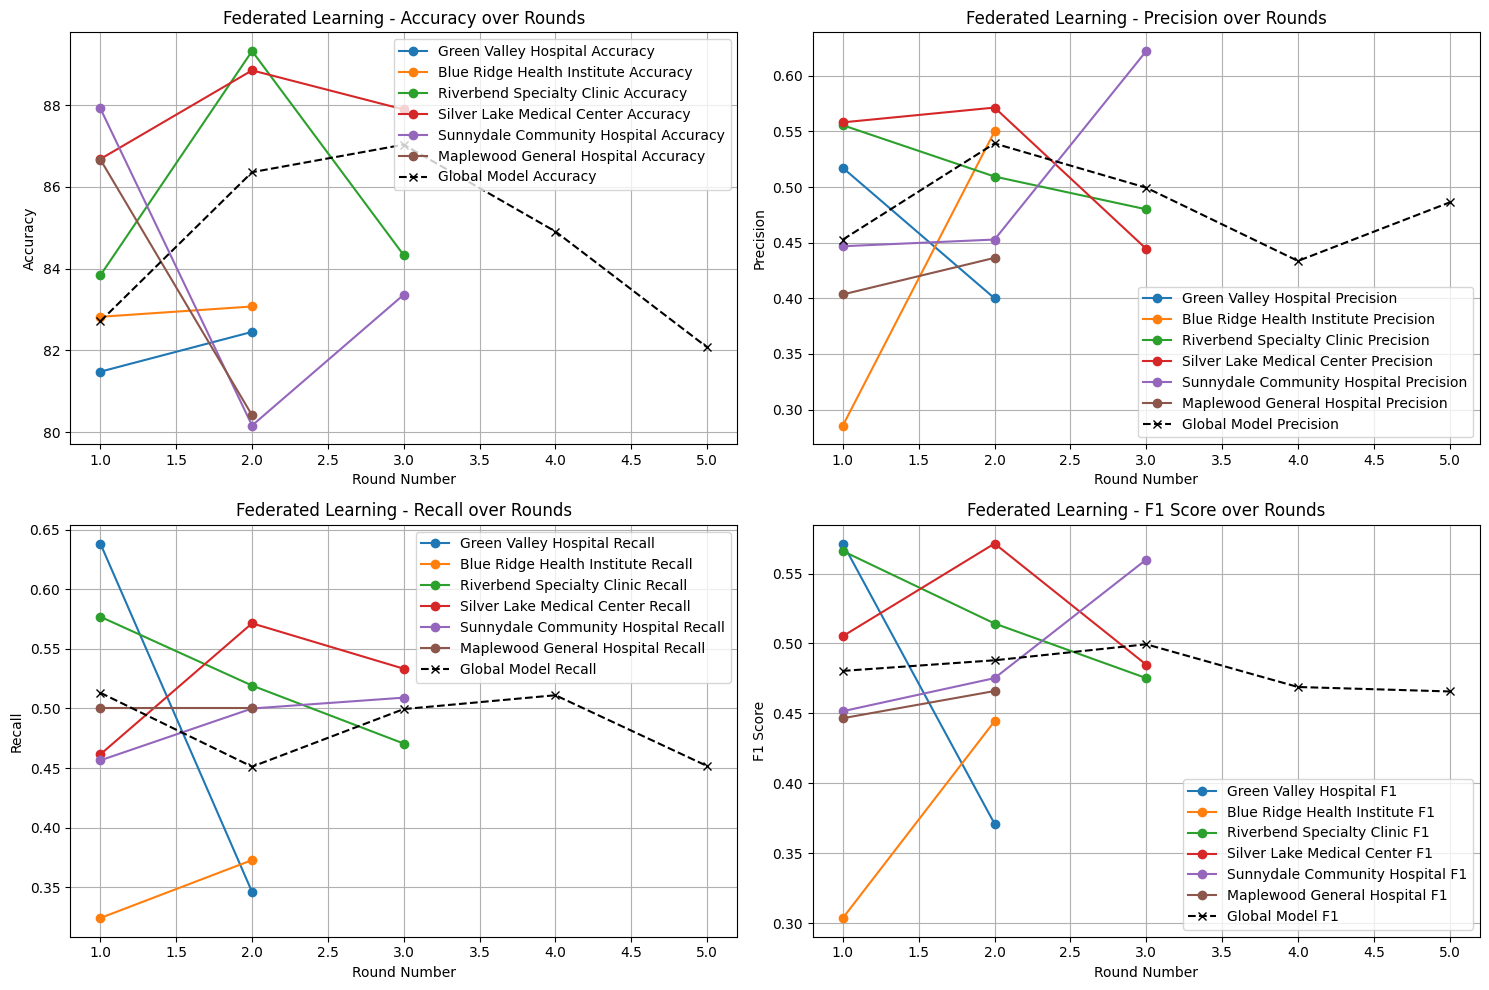

RMSE for Green Valley Hospital: 1.5524174696260025
Confusion Matrix for Green Valley Hospital:
[[ 3  7  6  4]
 [10  6  5  8]
 [ 8  7 11  5]
 [ 6  6  5  3]]



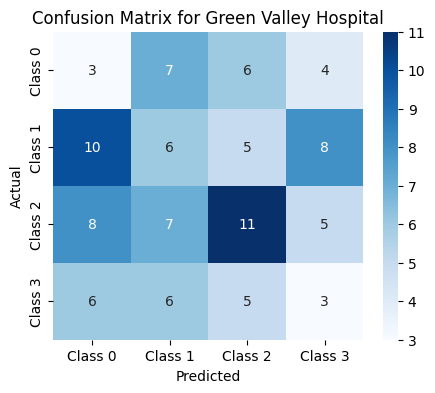

RMSE for Blue Ridge Health Institute: 1.466287829861518
Confusion Matrix for Blue Ridge Health Institute:
[[10  7  4  5]
 [ 4  8  5  7]
 [ 7 11  6  5]
 [ 5  4  5  7]]



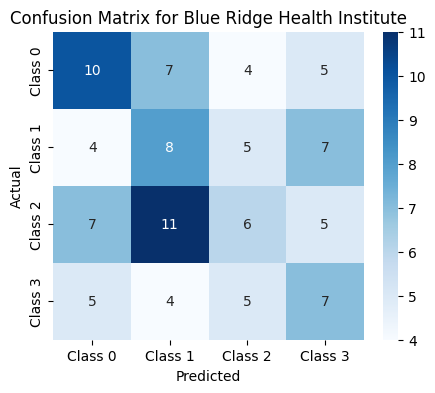

RMSE for Riverbend Specialty Clinic: 1.4317821063276353
Confusion Matrix for Riverbend Specialty Clinic:
[[10  8  8  7]
 [ 5  9  2  1]
 [ 7  5  9  9]
 [ 2  6  7  5]]



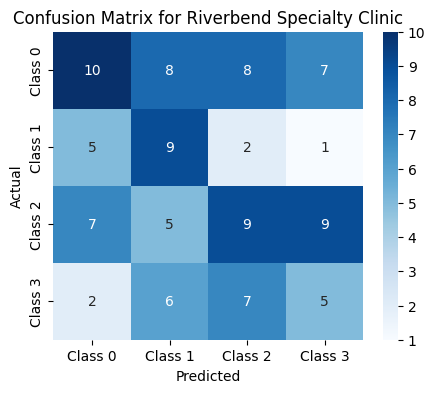

RMSE for Silver Lake Medical Center: 1.5968719422671311
Confusion Matrix for Silver Lake Medical Center:
[[ 8  5  2  6]
 [ 9  6 10  6]
 [ 4  6  9  1]
 [ 8 11  6  3]]



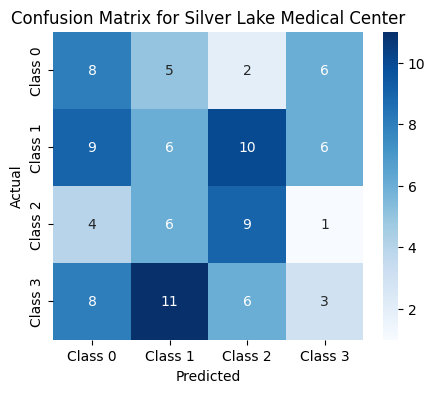

RMSE for Sunnydale Community Hospital: 1.5652475842498528
Confusion Matrix for Sunnydale Community Hospital:
[[ 3  2 10  4]
 [ 8  7  9  6]
 [ 7  8  5  3]
 [ 6  7  5 10]]



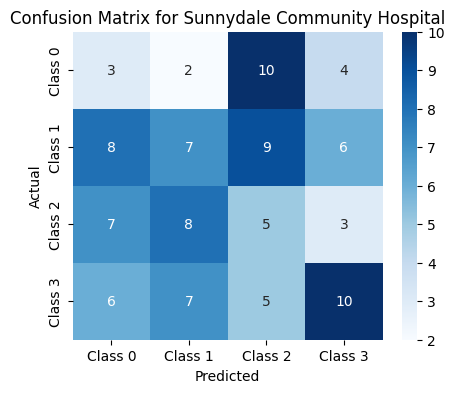

RMSE for Maplewood General Hospital: 1.6401219466856725
Confusion Matrix for Maplewood General Hospital:
[[ 6 10  4  9]
 [ 1  6  3  6]
 [ 6  8  4 10]
 [ 8  3  8  8]]



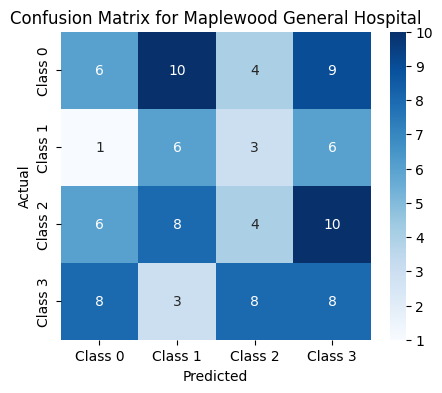

Global Model RMSE: 1.5438048235879214
Global Model Confusion Matrix:
[[40 39 34 35]
 [37 42 34 34]
 [39 45 44 33]
 [35 37 36 36]]



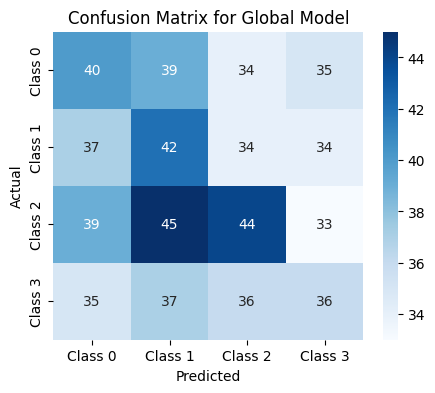

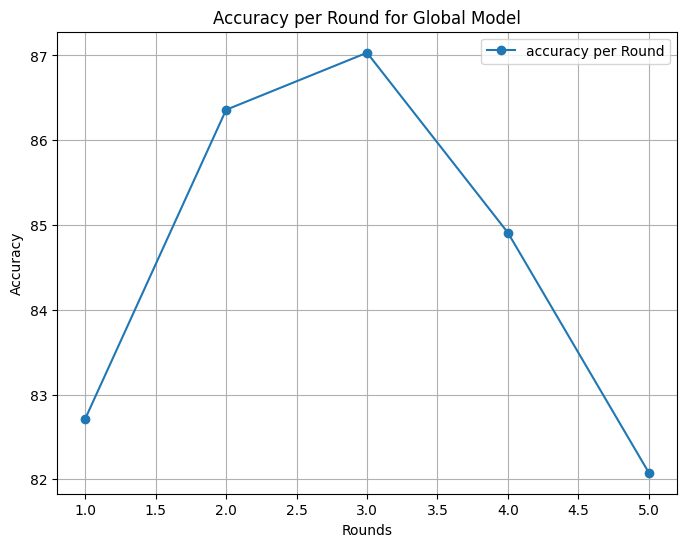

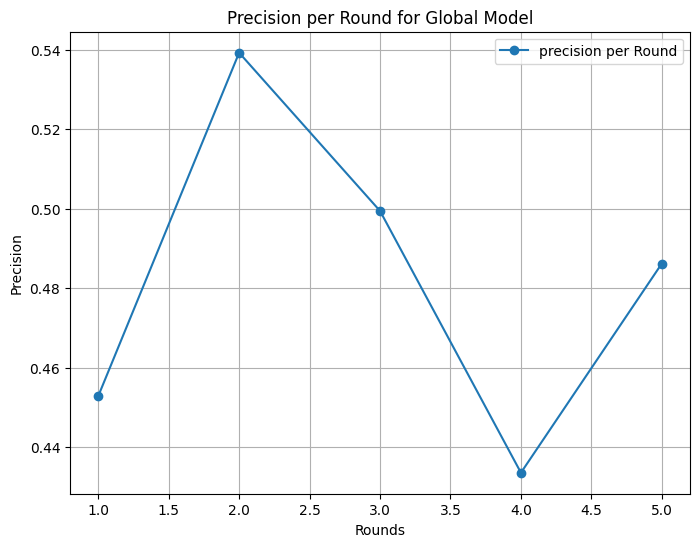

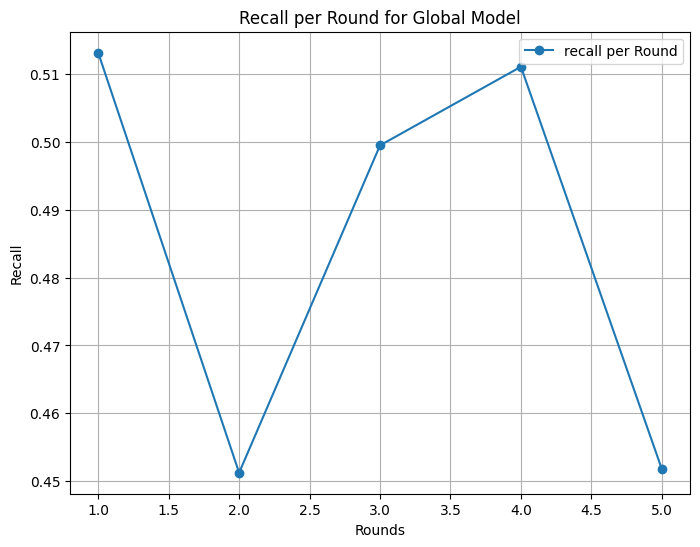

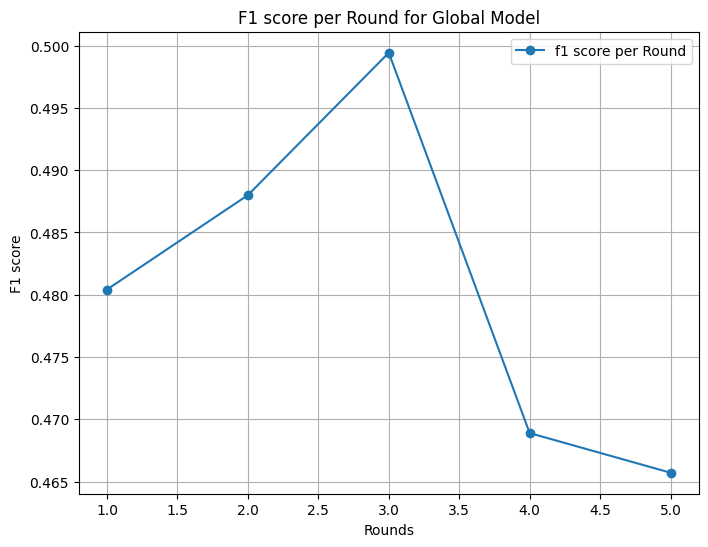

In [25]:
# Main execution
if __name__ == "__main__":
    clients = ["Green Valley Hospital", "Blue Ridge Health Institute", "Riverbend Specialty Clinic",
               "Silver Lake Medical Center", "Sunnydale Community Hospital", "Maplewood General Hospital"]

    round_participation = {
        1: ["Green Valley Hospital", "Blue Ridge Health Institute", "Riverbend Specialty Clinic"],
        2: ["Blue Ridge Health Institute", "Riverbend Specialty Clinic", "Silver Lake Medical Center"],
        3: ["Riverbend Specialty Clinic", "Silver Lake Medical Center", "Sunnydale Community Hospital"],
        4: ["Silver Lake Medical Center", "Sunnydale Community Hospital", "Maplewood General Hospital"],
        5: ["Sunnydale Community Hospital", "Maplewood General Hospital", "Green Valley Hospital"]
    }

    num_rounds = 5

    client_percentages = {
        "Green Valley Hospital": 0.2,
        "Blue Ridge Health Institute": 0.15,
        "Riverbend Specialty Clinic": 0.1,
        "Silver Lake Medical Center": 0.25,
        "Sunnydale Community Hospital": 0.2,
        "Maplewood General Hospital": 0.1
    }

    # Run federated learning simulation
    metrics_data, global_acc, global_prec, global_rec, global_f1 = federated_learning(client_percentages, num_rounds, round_participation, clients)

    # Visualize results
    visualize_metrics(num_rounds, metrics_data, global_acc, global_prec, global_rec, global_f1)

    # Example: Actual and predicted labels for each client (mocked for demonstration)
    actual_labels = {client: np.random.randint(0, 4, size=100) for client in clients}
    predicted_labels = {client: np.random.randint(0, 4, size=100) for client in clients}
    class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

    # Print RMSE and confusion matrix for each client
    print_metrics(actual_labels, predicted_labels, class_names)

    # Global actual and predicted labels (concatenated from all clients)
    global_actual = np.concatenate([actual_labels[client] for client in clients])
    global_predicted = np.concatenate([predicted_labels[client] for client in clients])

    # Print global model metrics
    print_global_metrics(global_actual, global_predicted, class_names)

    # Plot global model metrics for illustration
    plot_global_model_metrics(global_acc, 'accuracy')
    plot_global_model_metrics(global_prec, 'precision')
    plot_global_model_metrics(global_rec, 'recall')
    plot_global_model_metrics(global_f1, 'f1 score')